# **DEEP LEARNING**

**Ejemplos del texto de Python Deep Learning de Jordi Torres**

## **EJEMPLO RECONOCIMIENTO DE DIGITOS**

Este ejemplo básico de iniciación analogo al *Hola mundo* de la programación emplea una base bien conocidad de imagenes estandarizadas para ilustrar y facilitar la adquisicion de los principales conceptos asociados a las redes neuronales.

Para ello se emplea la base de imagenes disponible en la libreria **KERAS**.

In [17]:
# Carga de librerias requeridas
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [22]:
# Uso del ejemplo MNIST cargado como ejemplo en la libreria TensorFlow
mnist=tf.keras.datasets.mnist

(x_train,y_train), (x_test,y_test)=mnist.load_data()

VIsualizando una imagen cualquiera se tiene:

La etiqueta de la imagen es:  3


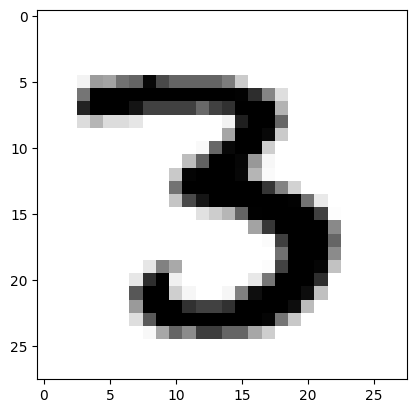

In [19]:
# Visualizacion de una imagen y su correspondiente etiqueta
i=12
plt.imshow(x_train[i],cmap=plt.cm.binary)
print('La etiqueta de la imagen es: ',y_train[i])

Las caracteristicas del arreglo de entrenamiento *x_train* se detalla a continuacion, donde la dimensión del arreglo es 3 (tensor), la forma muestra que se tienen 60000 imagenes de 28 por 28 pixeles y finalmente el tipo de dato corresponde a enteros de 8 bits.

In [20]:
# Dimension del arreglo
print(x_train.ndim)

# Forma o tamaño del arreglo
print(x_train.shape)

# Tipo de datos
print(x_train.dtype)

3
(60000, 28, 28)
uint8


### **Preprocesado**

Generalmente las caracteristicas que serviran de entrada a una ***Red Neuronal*** se preprocesan a fin de evitar varios problemas y facilitar su procesamiento. Particularmente, la escala entre diferentes caracteristicas puede ser muy diferente lo cual puede afectar de manera importante la estimación de los pesos en la red.
Los principales o más habituales pasos de preprocesamiento son:

 - **Vectorización** : Permite manejar los datos de las caracteristicas de manera más simple para la red, pues se reduce la dimensión siendo mas facil recorrer todos los valores con un eje en lugar de 2 o mas.
 - **Normalización** : Facilita la convergencia en el procesode entrenamiento, generalmente se normaliza a valores entre 0 y 1.

Para el caso del ejemplo los valores varian entre 0 y 255, de tal manera que se normalizan a valores entre cero  y uno así:


In [24]:
# Antes de la normalizacion
print(x_train[5,9:-7,9:-7])

# Aplicando la normalizacion
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train_N=x_train/255
x_test_N=x_test/255

# Despues de la normalización
print(x_train_N[5,9:-7,9:-7])


[[ 96. 252. 252. 252. 252. 217.  29.   0.  37. 252. 252.  60.]
 [181. 252. 252. 220. 167.  30.   0.   0.  77. 252. 252.  60.]
 [ 26. 128.  58.  22.   0.   0.   0.   0. 100. 252. 252.  60.]
 [  0.   0.   0.   0.   0.   0.   0.   0. 157. 252. 252.  60.]
 [  0.   0.   0.   0. 110. 121. 122. 121. 202. 252. 194.   3.]
 [  0.  10.  53. 179. 253. 253. 255. 253. 253. 228.  35.   0.]
 [ 54. 227. 252. 243. 228. 170. 242. 252. 252. 231. 117.   6.]
 [252. 252. 125.  59.   0.  18. 208. 252. 252. 252. 252.  87.]
 [252. 180.  16.   0.  21. 203. 253. 247. 129. 173. 252. 252.]
 [106.  17.   0.  53. 200. 252. 216.  65.   0.  14.  72. 163.]
 [ 18.  73. 170. 244. 252. 126.  29.   0.   0.   0.   0.   0.]
 [216. 252. 252. 252. 124.   3.   0.   0.   0.   0.   0.   0.]]
[[0.3764706  0.9882353  0.9882353  0.9882353  0.9882353  0.8509804  0.11372549 0.         0.14509805 0.9882353  0.9882353  0.23529412]
 [0.70980394 0.9882353  0.9882353  0.8627451  0.654902   0.11764706 0.         0.         0.3019608  0.98823

Finalmente la vectorización se obtiene usando ***reshape*** sobre los elementos de las imagenes tanto para el conjunto de entrenamiento como para el de prueba.

In [29]:
# Aplicando la vectorización
x_train_V=x_train_N.reshape(60000,784)
x_test_V=x_test_N.reshape(10000,784)

# Verificando el tamaño final de los arreglos
print('Nuevo tamaño del arreglo de entrenamiento: ',x_train_V.shape)
print('Nuevo tamaño del arreglo de prueba: ',x_test_V.shape)

Nuevo tamaño del arreglo de entrenamiento:  (60000, 784)
Nuevo tamaño del arreglo de prueba:  (10000, 784)


**Etiquetas**

Dado que en este caso se tienen 10 categorias para la clasificación de las imagenes, entonces se suele emplear (porque? aun no lo se) varaibles *dummy* para identificar la posición de la categoria en el vector con un 1 y ceros para los demas valores. Esto se denomina ***Codificación one-hot*** y se aplica a partir del modulo *utils* de *keras* así:


In [30]:
# Uso del modulo to_categorical de keras
from tensorflow.keras.utils import to_categorical

In [32]:
# Valores de etiquetas antes de transformacion

print('Valor de la etiqueta 5 en el set de entrenamiento:', y_train[5])

y_train_OS=to_categorical(y_train,num_classes=10)
y_test_OS=to_categorical(y_test,num_classes=10)

print('Valor de la etiqueta 5 en el set de entrenamiento luego de la transformación:', y_train_OS[5])

print('Tamaño del arreglo de etiquetas:', y_train_OS.shape)

Valor de la etiqueta 5 en el set de entrenamiento: 2
Valor de la etiqueta 5 en el set de entrenamiento luego de la transformación: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Tamaño del arreglo de etiquetas: (60000, 10)
